# Caminhadas Aleatórias

#### Nome: Arthur Pontes Nader
#### Matrícula: 2019022294

## Bibliotecas

In [76]:
import numpy as np
import matplotlib.pyplot as plt

## Função para gerar caminhada

In [77]:
def gerar_caminhada(N, d):
    
    evolucao = np.empty((N, d))
    cumulativo = np.empty((N, d))
    
    x = np.random.uniform(-0.5, 0.5)
    evolucao[0, 0] = x
    cumulativo[0, 0] = x
    
    if d == 2:
        y = np.random.uniform(-0.5, 0.5)
        evolucao [0,1] = y
        cumulativo[0,1] = y
        
    
    for i in range(1, N):
    
        x = np.random.uniform(-0.5, 0.5)
    
        evolucao[i, 0] = x
        cumulativo[i, 0] = cumulativo[i-1, 0] + x
    
        if d == 2:
            y = np.random.uniform(-0.5, 0.5)
    
            evolucao[i, 1] = y
            cumulativo[i, 1] = cumulativo[i-1, 1] + y
        
    return evolucao, cumulativo

In [205]:
caminhada = gerar_caminhada(9, 2)
print("Passos:\n" + str(caminhada[0]) + "\n")
print("Acumulado:\n" + str(caminhada[1]) + "\n")

Passos:
[[-0.16046291  0.17172925]
 [ 0.35256669  0.0409575 ]
 [ 0.37533599  0.30813998]
 [ 0.22964837 -0.48801198]
 [-0.42798897  0.19895172]
 [ 0.32515133  0.35002789]
 [ 0.47940361  0.43932872]
 [-0.22820437  0.13278809]
 [ 0.39361055  0.43552276]]

Acumulado:
[[-0.16046291  0.17172925]
 [ 0.19210377  0.21268674]
 [ 0.56743977  0.52082672]
 [ 0.79708813  0.03281474]
 [ 0.36909916  0.23176647]
 [ 0.69425049  0.58179435]
 [ 1.1736541   1.02112307]
 [ 0.94544972  1.15391116]
 [ 1.33906027  1.58943392]]



## Caminhada unidimensional

In [16]:
def gerar_grafico_unidimensional(dados, passos):
    
    total_passos = np.arange(passos) 
    
    plt.figure(figsize=(16, 10))
    plt.xlabel("Passo", fontsize = 16)
    plt.ylabel("Posição", fontsize = 16)
   
    labels = 'Caminhante 1', 'Caminhante 2', 'Caminhante 3', 'Caminhante 4'
    cores = "tomato", "royalblue", "gold", "green"
    
    for i in range(4):
        plt.plot(total_passos, dados[i], label=labels[i], c=cores[i])

    plt.title("Posição de cada caminhante ao decorrer dos passos", fontsize = 24)
    plt.legend(fontsize = 16)
    plt.show()

In [20]:
caminhantes = []

for i in range(4):
    caminhantes.append(gerar_caminhada(10000, 1)[1])

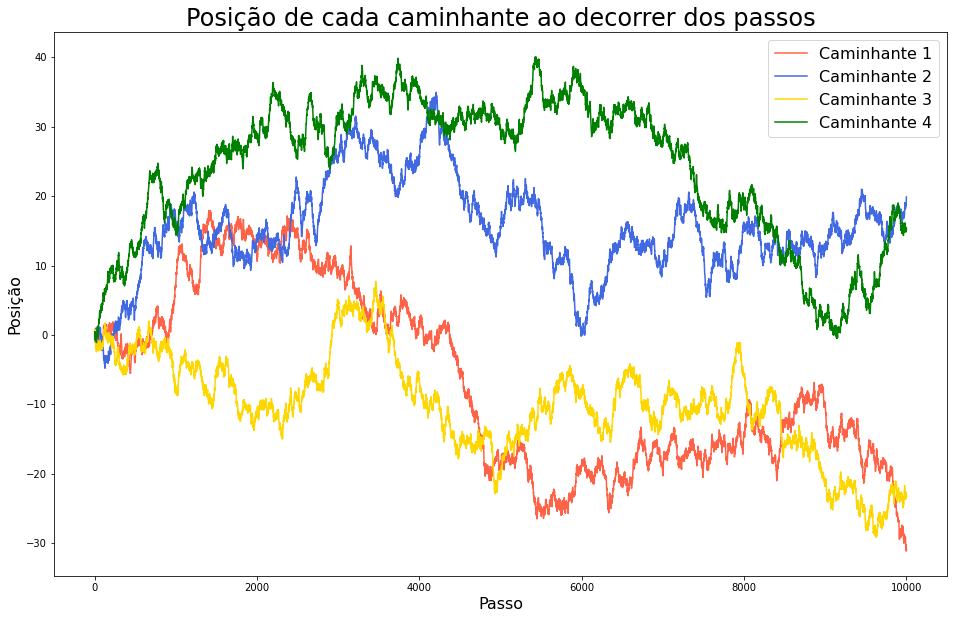

In [22]:
gerar_grafico_unidimensional(caminhantes, 10000)

## Caminhada bidimensional

In [68]:
def gerar_grafico_bidimensional(dados):
    
    plt.figure(figsize=(12, 12))
    plt.xlabel("Posição x", fontsize = 16)
    plt.ylabel("Posição y", fontsize = 16)
   
    labels = 'Caminhante 1', 'Caminhante 2', 'Caminhante 3', 'Caminhante 4'
    cores = "tomato", "royalblue", "gold", "green"
    
    for i in range(4):
        dados_aux = dados[i]
        plt.plot(dados_aux[:,0], dados_aux[:,1], label=labels[i], c=cores[i])

    plt.title("Evolução das posições x e y de cada caminhante", fontsize = 24)
    plt.legend(fontsize = 16)
    plt.show()

#### N = 10

In [122]:
caminhantes = []

for i in range(4):
    caminhantes.append(gerar_caminhada(10, 2)[1])

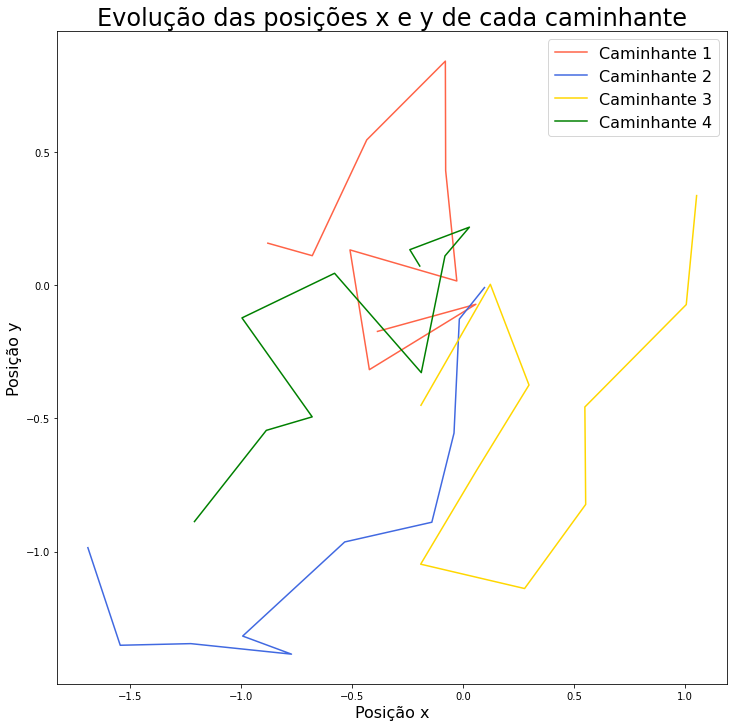

In [123]:
gerar_grafico_bidimensional(caminhantes)

#### N = 1000

In [71]:
caminhantes = []

for i in range(4):
    caminhantes.append(gerar_caminhada(1000, 2)[1])

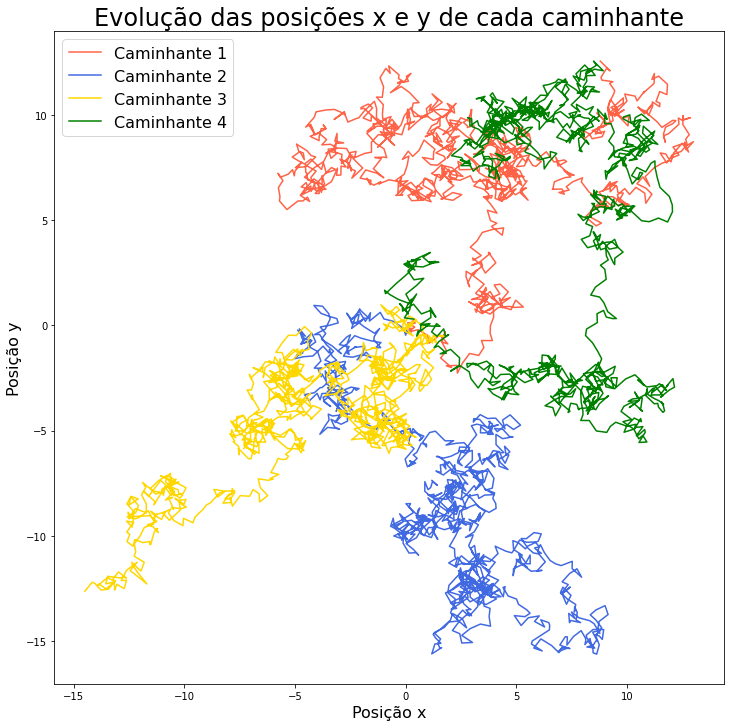

In [72]:
gerar_grafico_bidimensional(caminhantes)

#### N = 100000

In [73]:
caminhantes = []

for i in range(4):
    caminhantes.append(gerar_caminhada(100000, 2)[1])

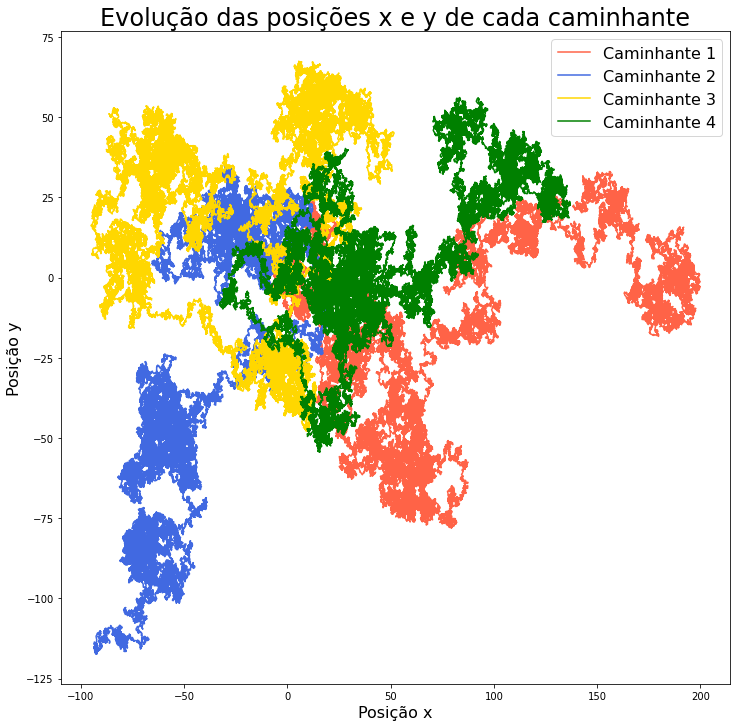

In [74]:
gerar_grafico_bidimensional(caminhantes)

## Determinação dos pontos finais

In [124]:
def determinar_pontos_finais(W, N, d):
    
    pontos_finais = np.empty((W, d))
    
    for i in range(W):
        
        caminhada = gerar_caminhada(N, d)
        ponto_final = caminhada[1][-1]
        pontos_finais[i] = ponto_final
        
    return pontos_finais


In [125]:
def gerar_grafico_dispersao(dados):
    
    plt.figure(figsize=(12, 12))
    plt.xlabel("Posição x", fontsize = 16)
    plt.ylabel("Posição y", fontsize = 16)
   
    labels = 'N = 1', 'N = 10'
    cores = "gold", "royalblue"
    
    for i in range(1,-1,-1):
        dados_aux = dados[i]
        plt.scatter(dados_aux[:,0], dados_aux[:,1], label=labels[i], c=cores[i])

    plt.title("Posições finais de caminhadas", fontsize = 24)
    plt.legend(fontsize = 16)
    plt.show()

In [126]:
caminhadas_n1 = determinar_pontos_finais(10000, 1, 2)
caminhadas_n10 = determinar_pontos_finais(10000, 10, 2)

dados = [caminhadas_n1, caminhadas_n10] 

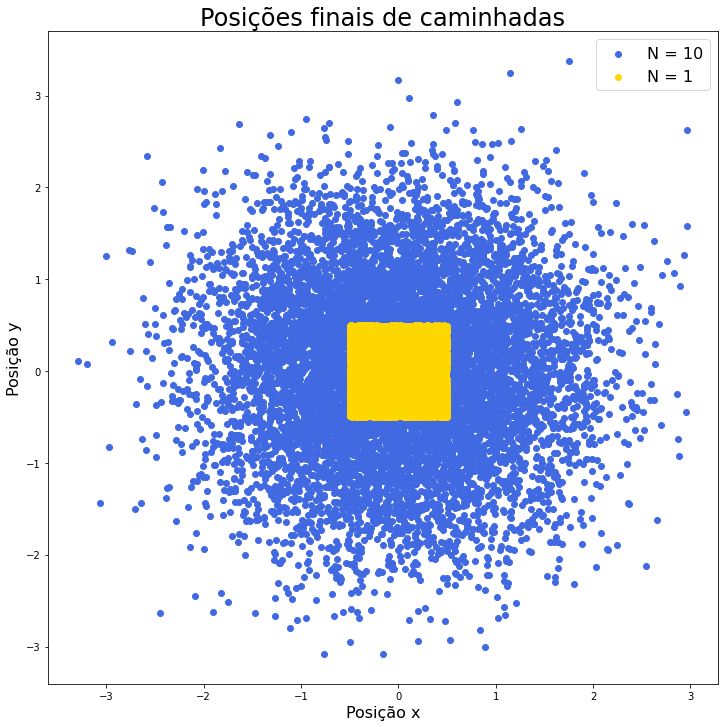

In [127]:
gerar_grafico_dispersao(dados)

## Desvio Quadrático Médio

In [131]:
a = 1/(2*np.sqrt(3))
print("Valor a = " + str(a))

Valor a = 0.2886751345948129


In [199]:
def plotar_histograma(dados, sigma, N, ymax):
    
    li = -3*sigma
    ls = 3*sigma
    
    plt.figure(figsize=(16, 8))
    plt.hist(dados, bins = 50, rwidth = 0.9)
    plt.fill_between([li, ls], 0, ymax, color='gold', alpha=0.3)
    plt.ylim(top=ymax)
    plt.text(li-0.08, ymax/2, '-3*sigma', fontsize = 12)
    plt.text(ls-0.08, ymax/2, '3*sigma', fontsize = 12)
    plt.title("Pontos finais para 10000 caminhadas com " + str(N) +" passo(s)", fontsize=18)
    plt.show() 

#### W = 10000 e N = 1

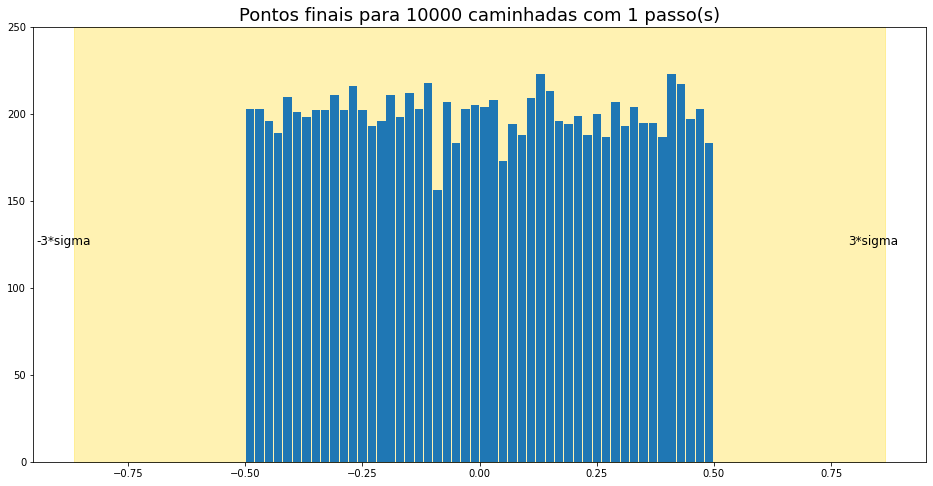

In [200]:
N = 1
sigma = np.sqrt(N)*a
caminhadas_n1 = determinar_pontos_finais(10000, N, 1)
plotar_histograma(caminhadas_n1, sigma, N, 250)

#### W = 10000 e N = 2

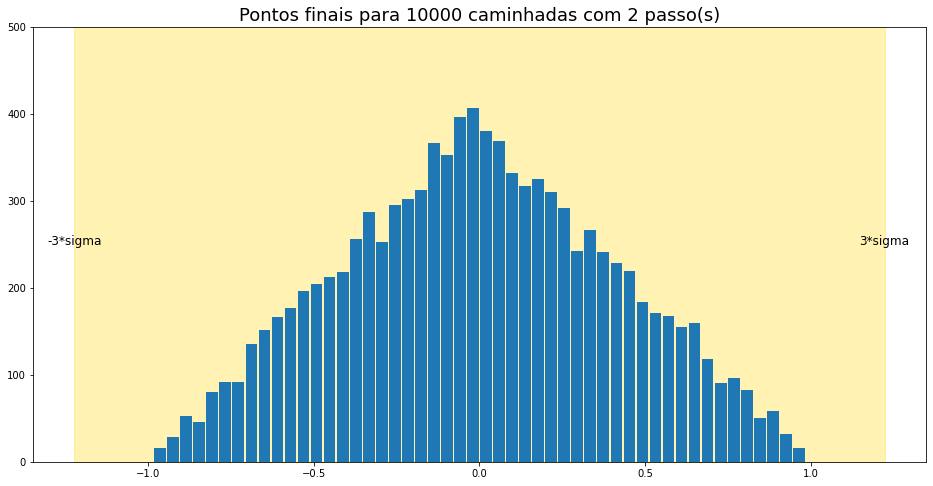

In [201]:
N = 2
sigma = np.sqrt(N)*a
caminhadas_n2 = determinar_pontos_finais(10000, N, 1)
plotar_histograma(caminhadas_n2, sigma, N, 500)

#### W = 10000 e N = 3

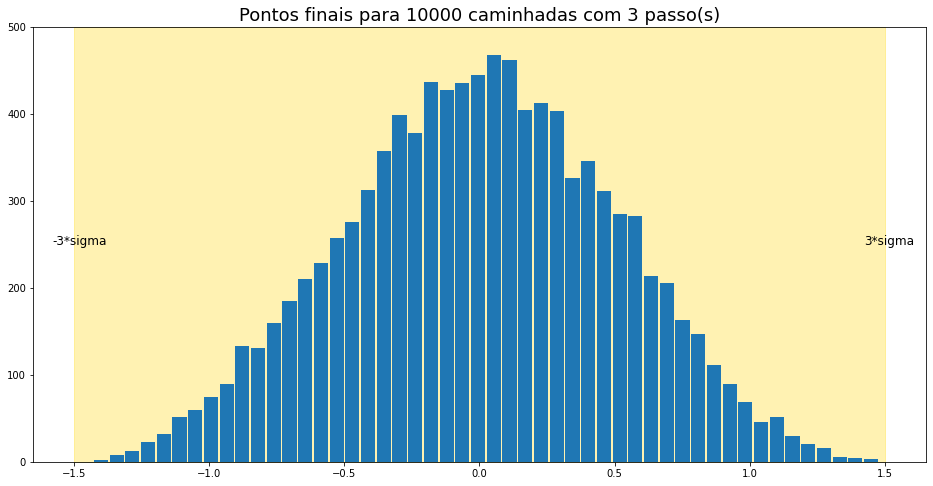

In [202]:
N = 3
sigma = np.sqrt(N)*a
caminhadas_n3 = determinar_pontos_finais(10000, N, 1)
plotar_histograma(caminhadas_n3, sigma, N, 500)

#### W = 10000 e N = 5

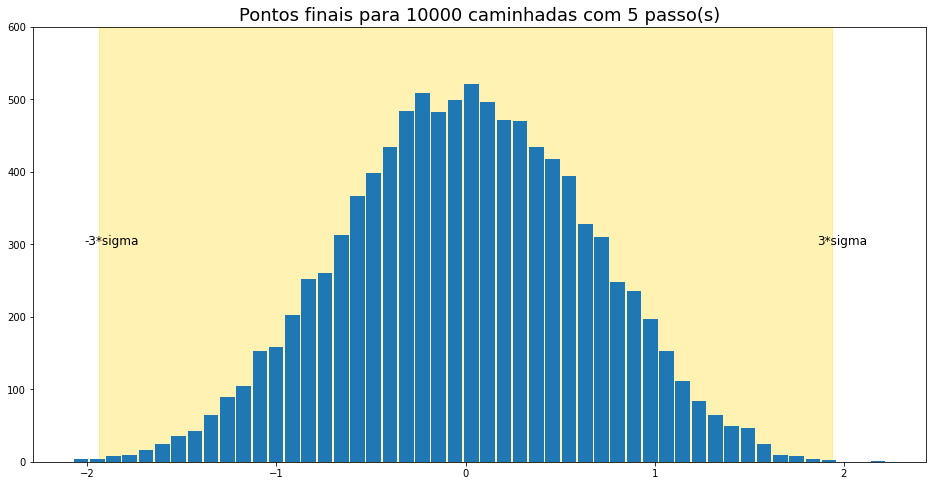

In [203]:
N = 5
sigma = np.sqrt(N)*a
caminhadas_n5 = determinar_pontos_finais(10000, N, 1)
plotar_histograma(caminhadas_n5, sigma, N, 600)

## Resultados e Conclusão

Na caminhada aleatória unidimensional, percebeu-se que houveram diversas ultrapassagens entre os quatro caminhantes ao decorrer dos passos, sendo que dois deles terminaram com valores finais negativos e dois com valores positivos.

Já na caminhada bidimensional, é possível notar a evolução da posição dos caminhantes em duas dimensões. Nesse caso, quanto maior o número de passos dados maior será a distância final da caminhada.

Tal como esperado, no gráfico de dispersão dos pontos finais de caminhadas para N = 1 ocorre uma
distribuição de probabilidades quadrada, enquanto para N = 10, as caminhadas estão distribuídas em um
padrão simétrico e circular. Assim, fica evidente que quanto mais passos, maior a tendência de simetria rotacional do modelo.

Analisando os quatro histogramas gerados, é possível observar que para N = 1, a aparência retangular indica um aspecto de distribuição uniforme, enquanto para N = 2, o histograma aparenta representar uma distribuição triangular. Já para N = 3, o histograma gerado já começa a se parecer com uma distribuição normal, sendo que para N = 5, esse comportamento fica ainda mais evidente. Nota-se que somente para N = 5 houveram valores de pontos finais fora do intervalo de -3\*sigma a 3 \*sigma